## Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with

In [20]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Get the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [22]:
# Data Exploration

print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


### Explanation of dataset
This fMNIST dataset contain 60,000 28x28 grayscale images along with a test set of 10,000 images.

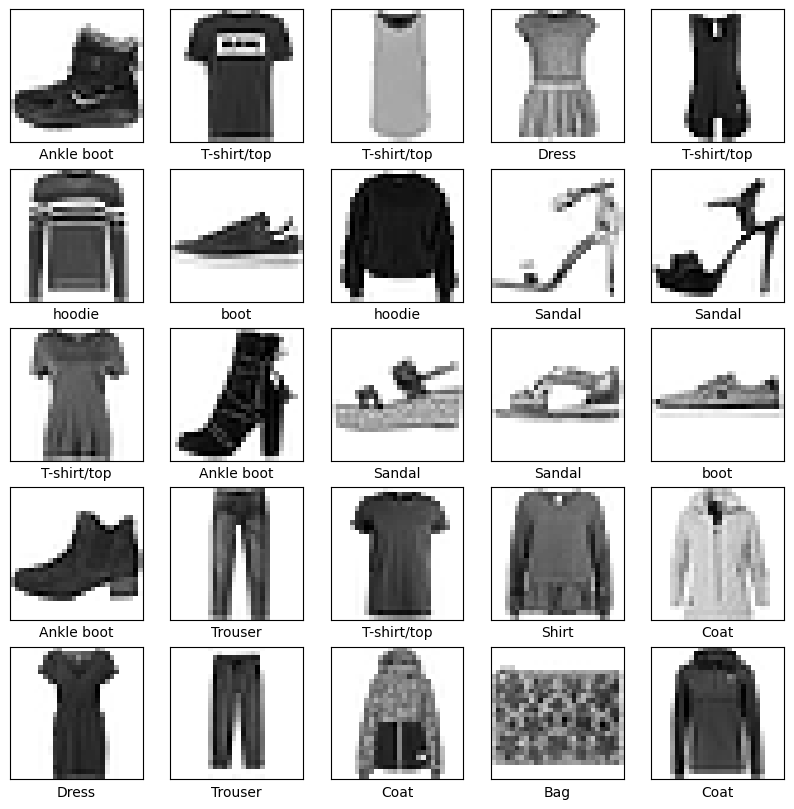

In [23]:
labels={
    0:'T-shirt/top',
    1:'Trouser',
    2:'hoodie',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'boot',
    8:'Bag',
    9:'Ankle boot'
}
# Visualize the train data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i]])

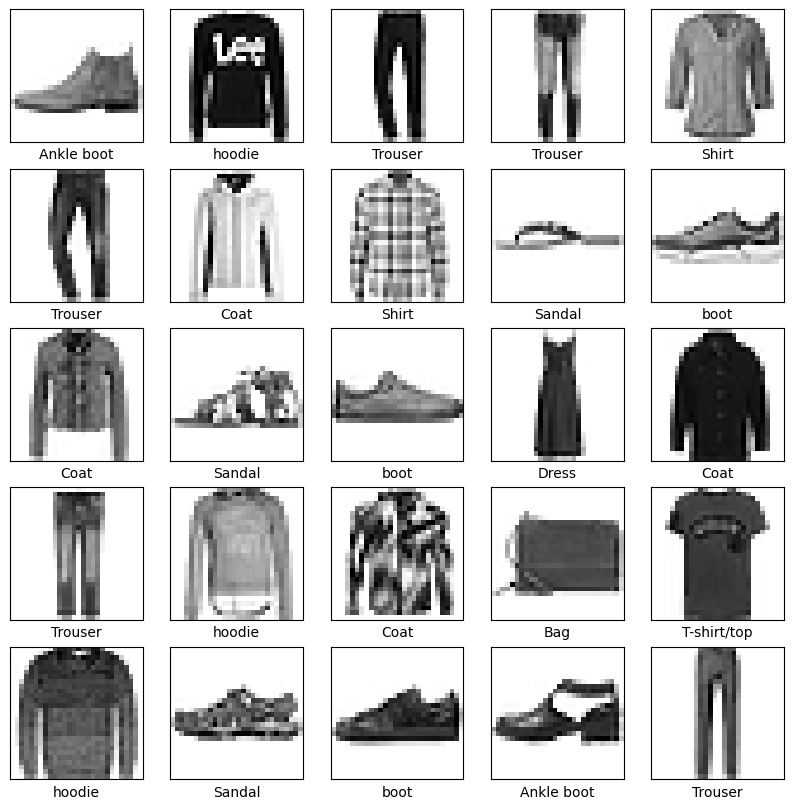

In [24]:
# Visualize the test data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[test_labels[i]])

In [25]:
train_labels[9]

5

## Train a dense neural network using Keras

In [26]:
# Flattening the 28x28 image into dim=1 (784,) vector (and over all images in the training set)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Normalizing the data to the range [0,1] by min-max range, and casting it to float32
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [27]:
# Define the model

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [28]:
# Compile the model

model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
# Fitting/Training the model

model.fit(train_images, train_labels, epochs=5, batch_size=160)

Epoch 1/5
375/375 [==============================] - 3s 8ms/step - loss: 0.5818 - accuracy: 0.7937
Epoch 2/5
375/375 [==============================] - 3s 8ms/step - loss: 0.3947 - accuracy: 0.8554
Epoch 3/5
375/375 [==============================] - 3s 8ms/step - loss: 0.3468 - accuracy: 0.8735
Epoch 4/5
375/375 [==============================] - 3s 8ms/step - loss: 0.3186 - accuracy: 0.8820
Epoch 5/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2988 - accuracy: 0.8896


## Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration

In [30]:
# Check accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy is: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8788
Test accuracy is: 0.8787999749183655


In [31]:
# Prediction for test image
y_pred = model.predict(test_images[9:10])


1/1 [==============================] - 0s 76ms/step


In [32]:
# Check the class with the highest probability
y_pred.argmax()

7

In [33]:
# Check the probability of the 7th class (of the zeroth data instance)
y_pred[0, 7]

0.99890435

In [34]:
# Check the actual label
test_labels[9]  

7

In [35]:
y_test_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_test_pred,axis = 1)

y_pred_classes[0]

confusionmatrix =tf.math.confusion_matrix(test_labels, y_pred_classes, num_classes=10)
print(confusionmatrix)

 27/313 [=>............................] - ETA: 0s 

313/313 [==============================] - 1s 2ms/step
tf.Tensor(
[[883   0   7  30   1   1  73   0   5   0]
 [  2 968   0  23   2   0   5   0   0   0]
 [ 20   0 754  18 104   0 103   0   1   0]
 [ 33   4   5 917  24   0  12   0   5   0]
 [  0   1  73  43 798   0  83   0   2   0]
 [  0   0   0   0   0 962   0  26   1  11]
 [186   1  60  41  65   0 642   0   5   0]
 [  0   0   0   0   0  13   0 938   0  49]
 [ 10   0   3   5   4   2  15   3 958   0]
 [  0   0   0   0   0   9   1  22   0 968]], shape=(10, 10), dtype=int32)


The classification model's number of right and wrong predictions in relation to the data's actual results (target value) are displayed in the confusion matrix. N is the number of target values (classes), and the matrix is NxN. The data in the matrix is frequently used to assess the performance of such models. A 2x2 confusion matrix for two classes (positive and negative) is shown in the table above.

number of incorrect predictions:  1212


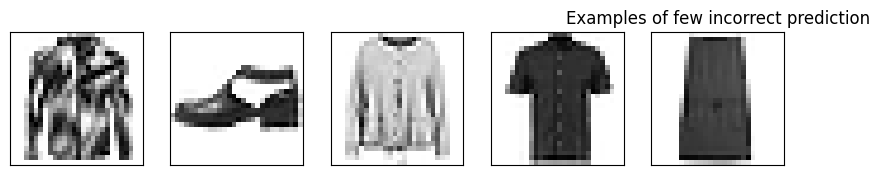

In [36]:
incorrects = np.nonzero( y_pred_classes != test_labels)[0]
print("number of incorrect predictions: ", len(incorrects))
#plot the incorrect predictions
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrects[:5]):
   
    plt.subplot(5,5,i+1)
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[incorrect].reshape(28,28), cmap=plt.cm.binary)
plt.title("Examples of few incorrect prediction")
plt.show()